In [1]:
!pip install spotipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import csv
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
sns.set_style("darkgrid")

In [4]:
credenciais = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id="2c0e886a72e2461ea86869990bff09fc", client_secret="88f528d22c9b45c29a023813f817e355"))

In [5]:
def get_artista_por_nome(name):
    busca = credenciais.search(name)
    items = busca['tracks']['items']
    if len(items) > 0:
        return items[0]['artists'][0]
    else:
        return None

def get_id_do_artista(artist):
    return artist['id']

def get_dados_do_artista(id):
 
  #Retornar albuns do artista
  albuns_do_artista = credenciais.artist_albums(id, country = 'BR', limit=10)
  albuns = {}

  for i in range(len(albuns_do_artista['items'])):
    id = albuns_do_artista['items'][i]['id']
    name = albuns_do_artista['items'][i]['name']
    albuns[id] = name
 
  return albuns

#Função para retornar os dados das músicas dos álbuns

def get_dados_dos_albuns(album_id, album_name):
  spotify_album = {}
  
  #Recuperar as músicas dos álbuns
  tracks = credenciais.album_tracks(album_id)
  
  for n in range(len(tracks['items'])):
    id_track = tracks['items'][n]['id']
    track = credenciais.track(id_track)
    spotify_album[id_track] = {}
    
    #As variaveis (dados) que estou buscando das músicas
    
    spotify_album[id_track]['album'] = album_name 
    spotify_album[id_track]['track_number'] = track['track_number'] 
    spotify_album[id_track]['name'] = track['name'] 
    spotify_album[id_track]['popularity'] = track['popularity'] 
    
  return spotify_album

#Função para retornar os dados de todos os albuns

def get_dados_de_todos_albuns(albums_ids_names):
  spotify_albums = []
  albums_names = []
  for id, name in albums_ids_names.items():
    if name not in albums_names:
      albums_names.append(name)
      dados_dos_albuns = get_dados_dos_albuns(id,name) 
    for item in dados_dos_albuns.items():
      spotify_albums.append(item[1]) 
  return spotify_albums

#Para poder analisar os dados coletados, precisamos criar uma Func p/ transformar todos os dados coletados em um arquivo CSV

def convert_to_csv(filepath, name):
  keys = filepath[0].keys()
  print(keys)
  csv_name = ''+ name + '.csv'
  with open(csv_name, 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(filepath)
  return

In [6]:
#Agora o mais importante, precisamos determinar de qual artista queremos coletar os dados e fazer a coleta

name = "The Strokes"

artista = get_artista_por_nome(name)    

#Se encontrar o artista no spotify:
if artista:
  id_do_artista = get_id_do_artista(artista)
  dados_do_artista = get_dados_do_artista(id_do_artista)
  dados_dos_albuns = get_dados_de_todos_albuns(dados_do_artista)
  convert_to_csv(dados_dos_albuns, 'The Strokes')   

else:
  logger.error("Can't find artist: %s", artista)

dict_keys(['album', 'track_number', 'name', 'popularity'])


In [7]:
dados = pd.read_csv("The Strokes.csv")

In [8]:
dados.head()

,album,track_number,name,popularity
0,The New Abnormal,1,The Adults Are Talking,76
1,The New Abnormal,2,Selfless,71
2,The New Abnormal,3,Brooklyn Bridge To Chorus,68
3,The New Abnormal,4,Bad Decisions,69
4,The New Abnormal,5,Eternal Summer,67


In [9]:
dados.tail()

,album,track_number,name,popularity
78,Is This It,10,Trying Your Luck,52
79,Is This It,11,Take It Or Leave It,54
80,Brooklyn Bridge To Chorus,1,Brooklyn Bridge To Chorus,59
81,Bad Decisions,1,Bad Decisions,60
82,At The Door,1,At The Door,58


In [11]:
dados.shape

(83, 4)

In [12]:
dados.columns

Index(['album', 'track_number', 'name', 'popularity'], dtype='object')

In [13]:
dados.columns = ['nome_do_album', 'posicao_da_faixa',  'nome_da_faixa', 'popularidade']

In [14]:
dados.head(10)

,nome_do_album,posicao_da_faixa,nome_da_faixa,popularidade
0,The New Abnormal,1,The Adults Are Talking,76
1,The New Abnormal,2,Selfless,71
2,The New Abnormal,3,Brooklyn Bridge To Chorus,68
3,The New Abnormal,4,Bad Decisions,69
4,The New Abnormal,5,Eternal Summer,67
5,The New Abnormal,6,At The Door,65
6,The New Abnormal,7,Why Are Sundays So Depressing,67
7,The New Abnormal,8,Not The Same Anymore,64
8,The New Abnormal,9,Ode To The Mets,68
9,Comedown Machine,1,Tap Out,56


In [15]:
dados.isnull().sum()

nome_do_album       0
posicao_da_faixa    0
nome_da_faixa       0
popularidade        0
dtype: int64

In [16]:
dados['nome_do_album'].value_counts()

First Impressions Of Earth    28
Room On Fire                  11
Comedown Machine              11
Is This It                    11
Angles                        10
The New Abnormal               9
Bad Decisions                  1
At The Door                    1
Brooklyn Bridge To Chorus      1
Name: nome_do_album, dtype: int64

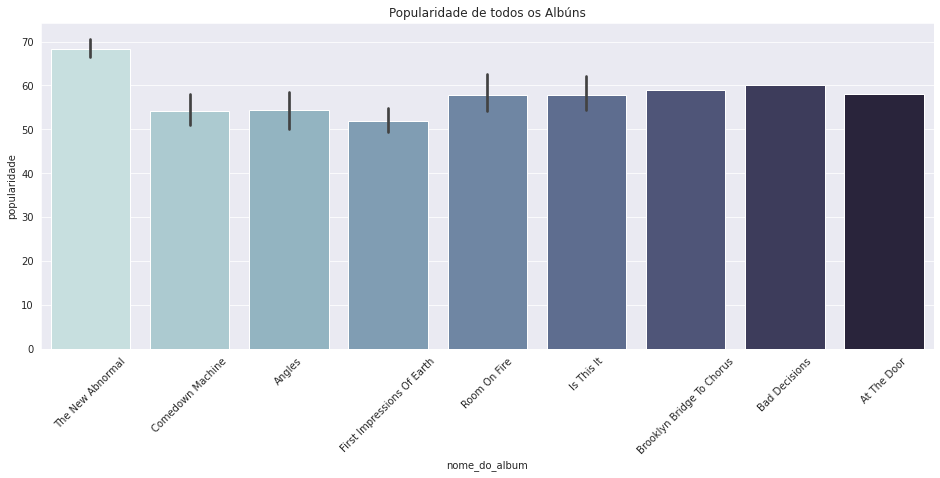

In [54]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
plt.grid(True)
x = dados['nome_do_album']
y = dados['popularidade']
plt.title("Popularidade de todos os Albúns")
sns.barplot(x=x, y=y, palette="ch:start=.2,rot=-.3", data=dados)
plt.show()

In [61]:
Is_This_It = dados.query("nome_do_album == 'Is This It' ")
Is_This_It.head()

,nome_do_album,posicao_da_faixa,nome_da_faixa,popularidade
69,Is This It,1,Is This It,58
70,Is This It,2,The Modern Age,57
71,Is This It,3,Soma,53
72,Is This It,4,Barely Legal,56
73,Is This It,5,Someday,68


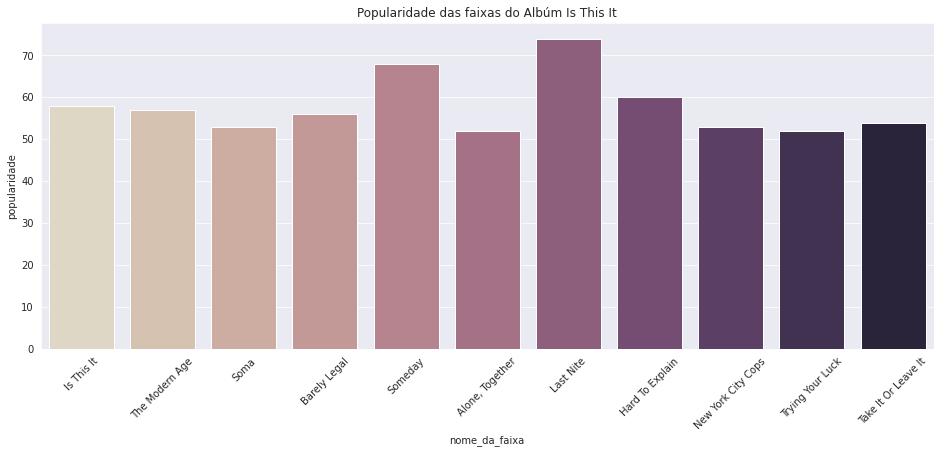

In [45]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
plt.grid(True)
x = Is_This_It['nome_da_faixa']
y = Is_This_It['popularidade']
plt.title("Popularidade das faixas do Albúm Is This It")
sns.barplot(x=x, y=y, palette="ch:s=-.2,r=.6", data=Is_This_It)
plt.show()

In [39]:
media_is_this_it = Is_This_It['popularidade'].mean()
media_is_this_it

57.90909090909091

In [40]:
 Room_On_Fire= dados.query("nome_do_album == 'Room On Fire' ")
 Room_On_Fire.head()

,nome_do_album,posicao_da_faixa,nome_da_faixa,popularidade
58,Room On Fire,1,What Ever Happened?,60
59,Room On Fire,2,Reptilia,76
60,Room On Fire,3,Automatic Stop,60
61,Room On Fire,4,12:51,62
62,Room On Fire,5,You Talk Way Too Much,53


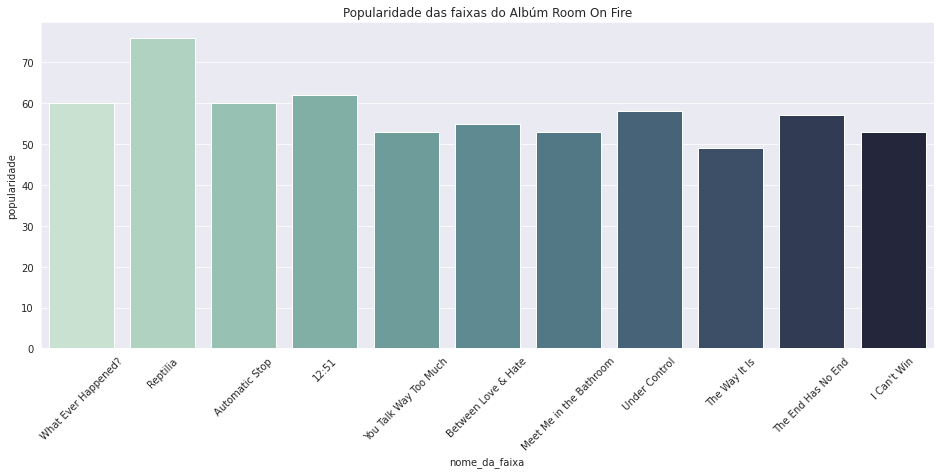

In [55]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
plt.grid(True)
x = Room_On_Fire['nome_da_faixa']
y = Room_On_Fire['popularidade']
plt.title("Popularidade das faixas do Albúm Room On Fire")
sns.barplot(x=x, y=y, palette="ch:start=.1,rot=-.4", data=Room_On_Fire)
plt.show()

In [42]:
media_room_on_fire = Room_On_Fire['popularidade'].mean()
media_room_on_fire

57.81818181818182

In [43]:
 First_Impressions = dados.query("nome_do_album == 'First Impressions Of Earth' ")
 First_Impressions.head()

,nome_do_album,posicao_da_faixa,nome_da_faixa,popularidade
30,First Impressions Of Earth,1,You Only Live Once,72
31,First Impressions Of Earth,2,Juicebox,60
32,First Impressions Of Earth,3,Heart In a Cage,61
33,First Impressions Of Earth,4,Razorblade,56
34,First Impressions Of Earth,5,On the Other Side,53


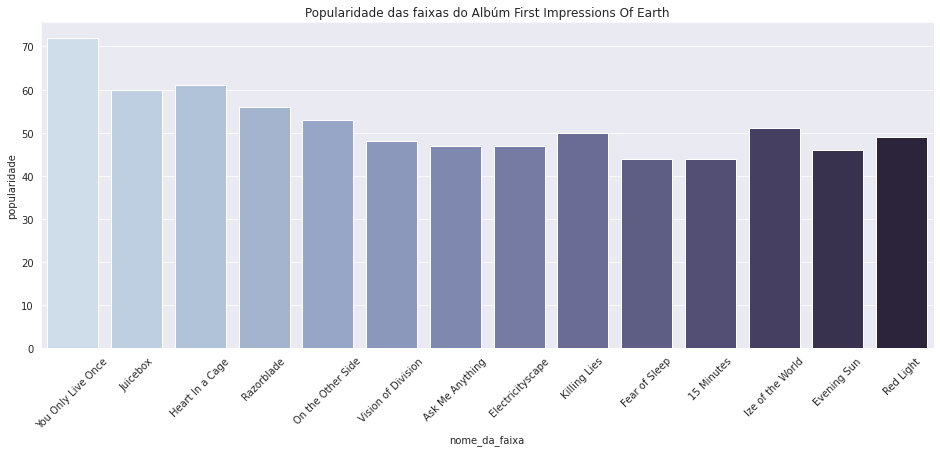

In [60]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
plt.grid(True)
x = First_Impressions['nome_da_faixa']
y = First_Impressions['popularidade']
plt.title("Popularidade das faixas do Albúm First Impressions Of Earth")
sns.barplot(x=x, y=y, palette="ch:start=.2,rot=-.2", data=First_Impressions)
plt.show()

In [64]:
 media_First_Impressions = First_Impressions['popularidade'].mean()
 media_First_Impressions

52.0

In [62]:
 Angles = dados.query("nome_do_album == 'Angles' ")
 Angles.head()

,nome_do_album,posicao_da_faixa,nome_da_faixa,popularidade
20,Angles,1,Machu Picchu,63
21,Angles,2,Under Cover of Darkness,69
22,Angles,3,Two Kinds of Happiness,49
23,Angles,4,You're So Right,46
24,Angles,5,Taken for a Fool,58


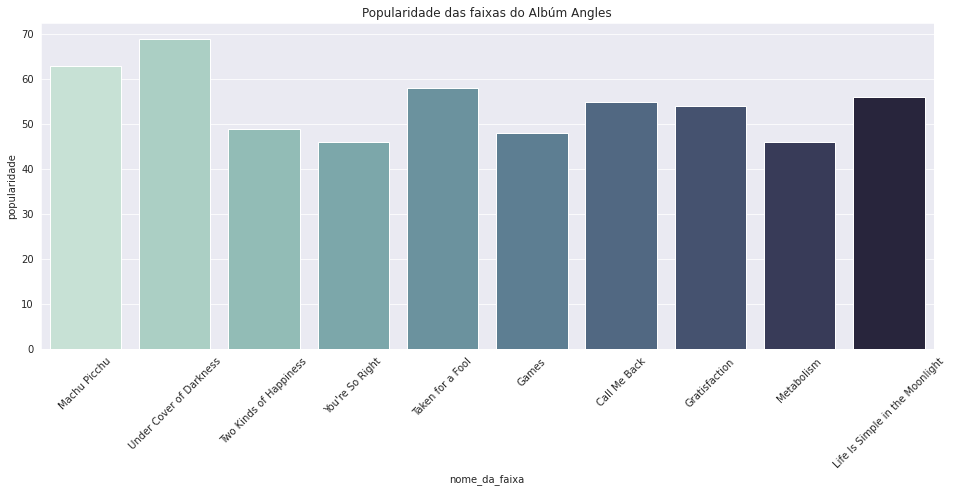

In [69]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
plt.grid(True)
x = Angles['nome_da_faixa']
y = Angles['popularidade']
plt.title("Popularidade das faixas do Albúm Angles")
sns.barplot(x=x, y=y, palette="ch:start=.2,rot=-.4", data=Angles)
plt.show()

In [71]:
media_angles = Angles['popularidade'].mean()
media_angles

54.4